# Proyecto Integrador
​
¡Bienvenidos a nuestro proyecto integrador! Durante estos días estarán poniendo en práctica sus habilidades en el campo de la predicción de datos. Deberán explorar bien los datos, entender la problemática, para luego experimentar con nuestros modelos de machine learning, usando las métricas correspondientes para medir la performance de los modelos y seleccionar el mejor.

Vale la pena destacar, que puede realizarse por equipos y que este proyecto no será revisado. El objetivo es poner en práctica los conceptos que se van adelantando en el M6, previo a la etapa de Labs que están por comenzar. Por tanto, es un proyecto que podrán tener un su portafolio personal, pero no tiene calificación cuantitativa. 

Este proyecto constará de tres fases: `Análisis exploratorio de datos`, `Preparación de datos` y `Modelamiento y evaluación`.
​
## ### 1. Análisis exploratorio de datos.
​​
Machine Learning en investigación de mercado automotor: El mercado automotor esta muy ligado a la cultura de cada país, según los gustos de cada uno, el mercado norteamericano, por ejemplo, valora mucho los motores y vehículos muy grandes, el mercado europeo prefiere el bajo consumo, el mercado latinoamericano, los precios finales bajos y asi varía según región, país, nivel socioeconómico y cultura. Un mismo vehículo puede tener un valor muy distinto de un pais al otro, y no solo por los impuestos o costos de producción, sino por cómo cotiza el modelo en el mercado.

### **Planteamiento de la problemática**
​
Hemos sido contratados en el equipo de ciencias de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de mercado de una importante automotriz china. Nuestro cliente desea ingresar a nuestro mercado de automóviles, por lo que nos han encomendado analizar las características de los vehículos presentes en el mercado actual. Dado que tienen en su catálogo una amplia colección de modelos de todo tipo, cuyo catálogo está estratificado en gamas según el gusto de cada región, desean saber qué características presentan los vehículos de gama alta y los de gama baja en nuestro mercado, para poder abarcar todo los públicos objetivos ajustándose a toda la demanda y, en base a estos datos, poder cotizar correctamente los vehículos que ofrecerá. 

Para ello, nuestro departamento de datos ha recopilado precios y características de varios de los modelos de vehículos disponibles en nuestro mercado, junto con sus precios de venta al público. Y han armado el siguiente diccionario de datos:


![DiccionarioDatos](https://github.com/jdeiloff/Proyecto-Integrador-M6/raw/main/dic_pi2.jpg)


Nuestro Data Lead nos ha recomendado que analicemos detalladamente los datos, los preprocesemos debidamente y que diseñemos dos modelos predictivos, uno para el precio y otro para distinguir vehículos de gama alta y de gama baja, utilizando la mediana de los precios como punto de corte. Desean obtener los archivos con las predicciones en formato de texto plano.

Además del análisis detallado de la exploración de los datos, estas son las dos predicciones posibles que les interesaría analizar:
​
1. Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición.

​2. Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.



## Entrega
​
Deben tener el código en un script .py o Jupyter Notebook .ipynb. Es muy importante explicar claramente cada paso realizado mediante comentarios en el script o textos formato markdown dentro del Notebook, pensar que cualquier persona debe entender de la mejor manera posible cada razonamiento y pasos aplicados.

Recuerden, además, que deben crear el repositorio que contenga el proyecto, por lo que es importante que le dediquen tiempo también a esta parte, dejando todo ordenado y con un README acorde, que sirva de introducción al contenido dentro de este.



# Análisis exploratorio de datos
- Se importan las librerias necesarias para realizarlo

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sns.set()

In [4]:
# - Se importa el dataset y se visualiza su información
df = pd.read_csv('ML_cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Se visualizan los encabezados de columnas y las primeras 4 filas.
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# Se explora la forma del dataset
df.shape

(205, 26)

In [13]:
# Se ven los nombres de las columnas
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [20]:
# Se procede a revisar si hay valores faltantes
valores_nulos_por_columna = df.isnull().sum()

# Se usa 'print' para ver la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos_por_columna)

Valores nulos por columna:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Se concluye que no hay valores faltantes dentro del dataset con **205 registros en 26 columnas.**

Se revisan los valores útiles

In [5]:
print(df.car_ID.unique())
print(df.CarName.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i'

Estas 2 columnas (CarID y CarName), para nuestro trabajo, podrían ser eliminadas o ignoradas ya que para este modelo no aportan un dato muy útil.

In [6]:
#Se eliminan las columnas mencionadas anteriormente
df.drop(['car_ID','CarName'] , axis = 1 , inplace = True)

Empezamos a revisar que otros datos pueden ser relevantes

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

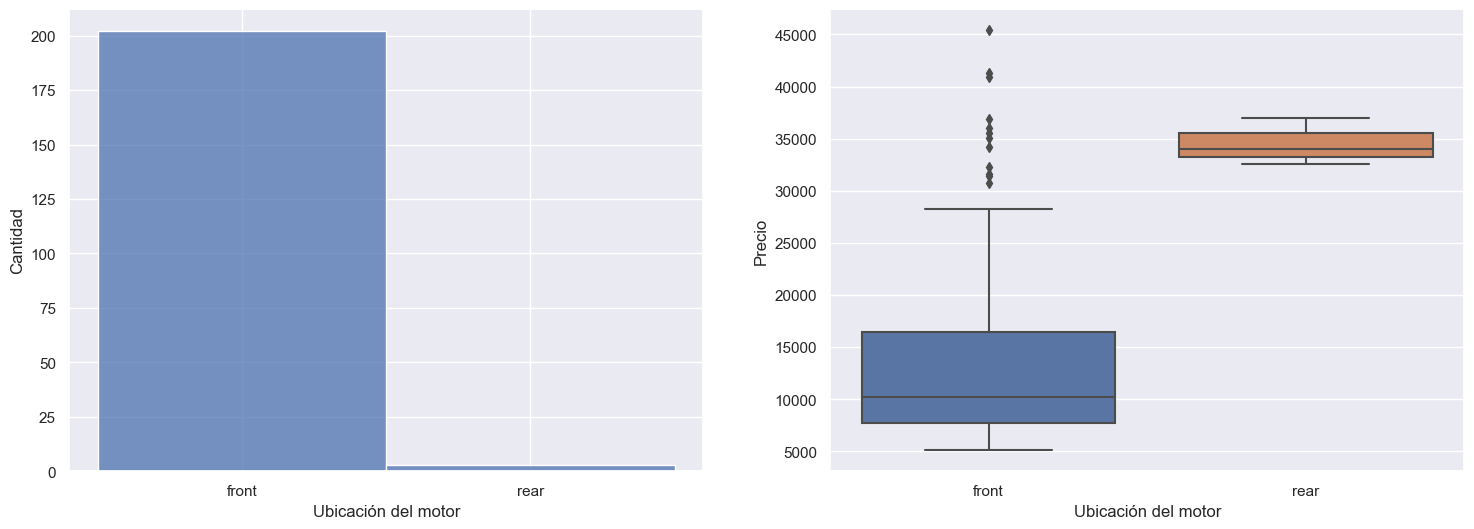

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico (histograma)
ax[0].set_xlabel('Ubicación del motor')
ax[0].set_ylabel('Cantidad')
sns.histplot(df['enginelocation'], ax=ax[0])

# Segundo gráfico (boxplot)
ax[1].set_xlabel('Ubicación del motor')
ax[1].set_ylabel('Precio')
sns.boxplot(y='price', x='enginelocation', data=df, ax=ax[1])

# Ajuste manual del ylabel, para que muestre "Precio" en vez de "price" y "Ubicación del motor" en vez de "enginelocation"
ax[1].set_ylabel('Precio')
ax[1].set_xlabel('Ubicación del motor')

plt.show()

En este gráfico se puede notar que claramente la ubicación del motor afecta al precio, los autos con el motor en la parte de atrás tienden a ser mucho más caros

Procedemos a ver si las demas variables son escenciales para el producto

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

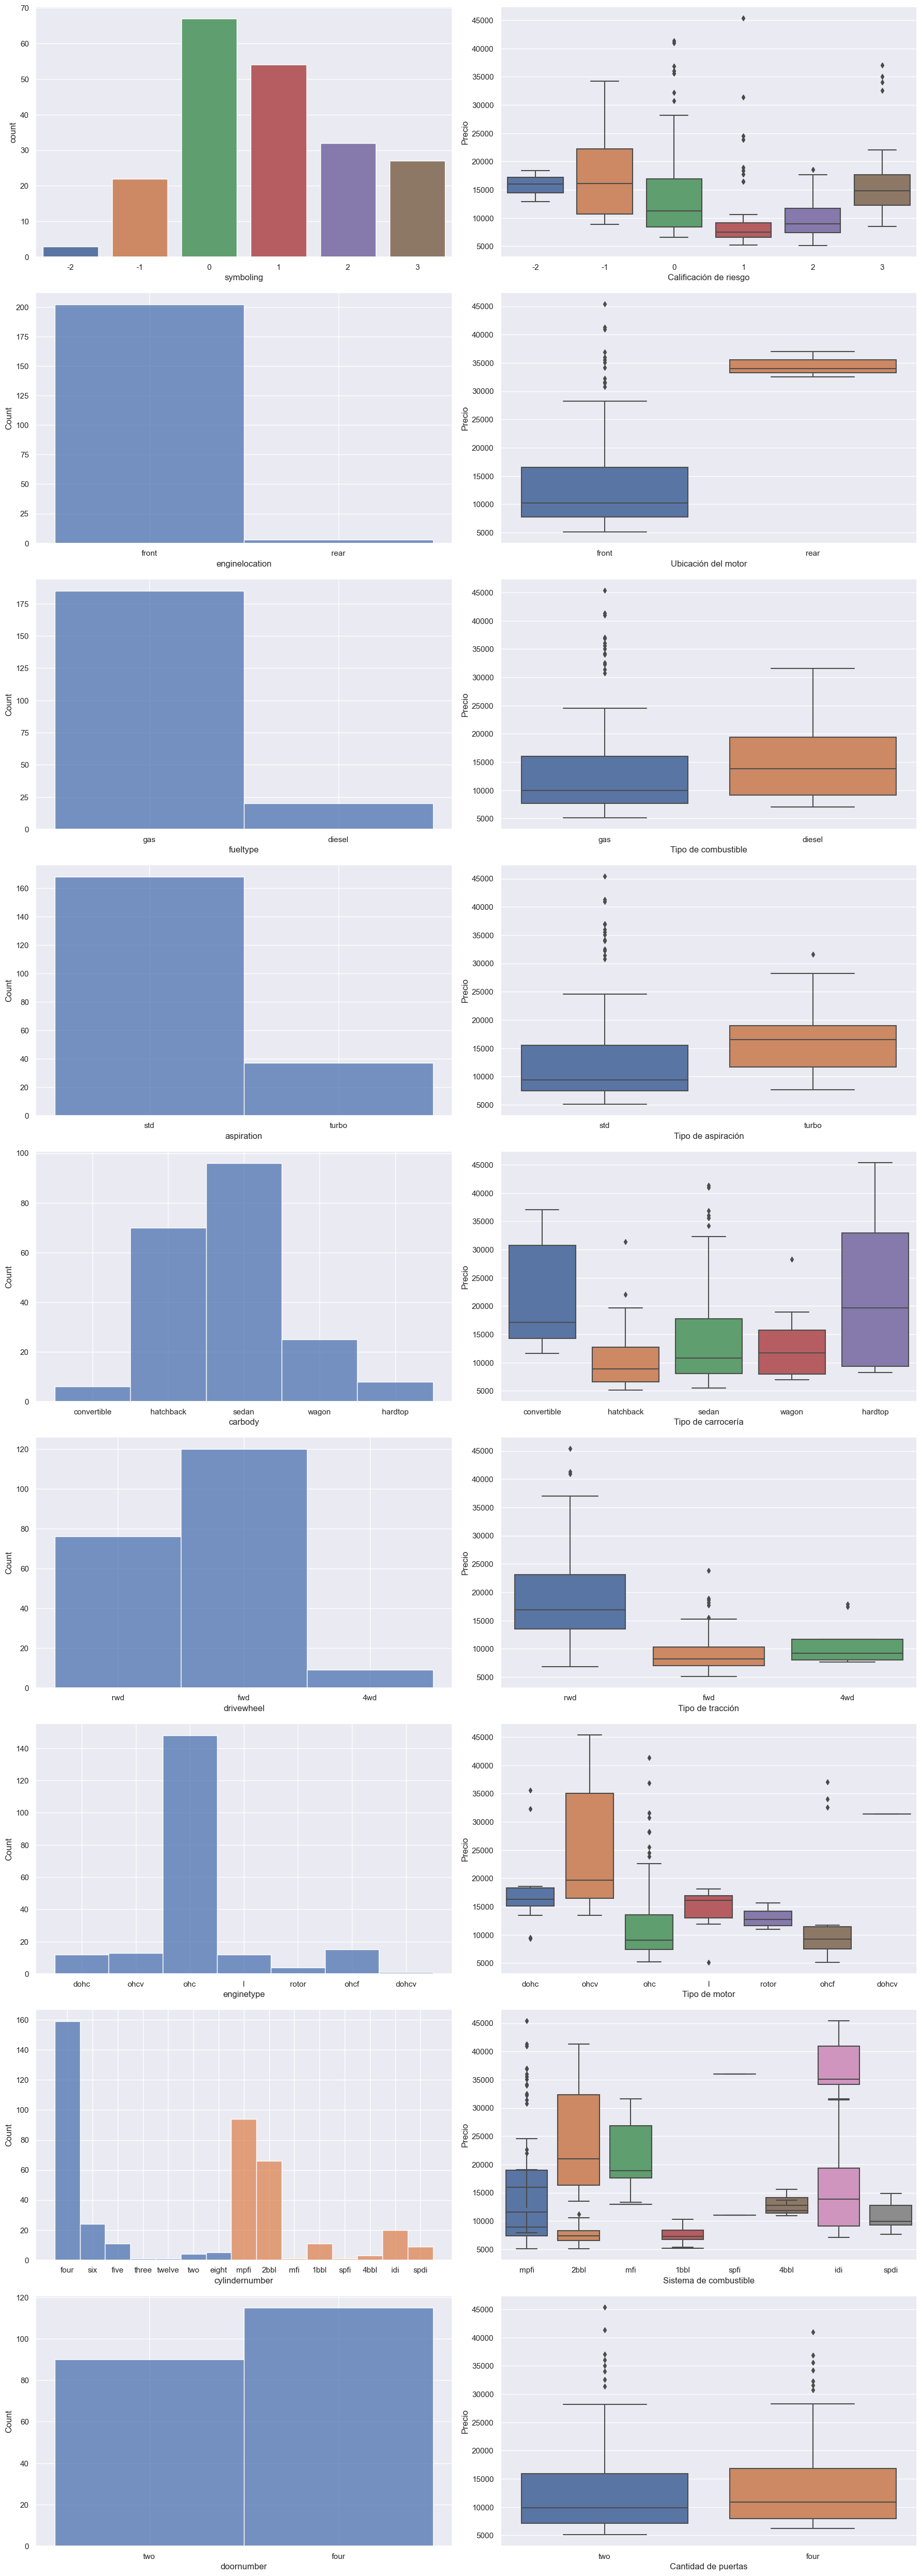

In [31]:
fig, ax = plt.subplots(9, 2, figsize=(18, 50))

# Calificación de riesgo
sns.countplot(x='symboling', data=df, ax=ax[0, 0])
sns.boxplot(x='symboling', y='price', data=df, ax=ax[0, 1])
ax[0, 1].set_ylabel('Precio')
ax[0, 1].set_xlabel('Calificación de riesgo')

# Ubicación del motor
sns.histplot(df['enginelocation'], ax=ax[1, 0])
sns.boxplot(y='price', x='enginelocation', data=df, ax=ax[1, 1])
ax[1, 1].set_ylabel('Precio')
ax[1, 1].set_xlabel('Ubicación del motor')

# Tipo de combustible
sns.histplot(df['fueltype'], ax=ax[2, 0])
sns.boxplot(x='fueltype', y='price', data=df, ax=ax[2, 1])
ax[2, 1].set_ylabel('Precio')
ax[2, 1].set_xlabel('Tipo de combustible')

# Tipo de aspiración
sns.histplot(df['aspiration'], ax=ax[3, 0])
sns.boxplot(x='aspiration', y='price', data=df, ax=ax[3, 1])
ax[3, 1].set_ylabel('Precio')
ax[3, 1].set_xlabel('Tipo de aspiración')

# Tipo de carrocería
sns.histplot(df['carbody'], ax=ax[4, 0])
sns.boxplot(x='carbody', y='price', data=df, ax=ax[4, 1])
ax[4, 1].set_ylabel('Precio')
ax[4, 1].set_xlabel('Tipo de carrocería')

# Tipo de tracción
sns.histplot(df['drivewheel'], ax=ax[5, 0])
sns.boxplot(x='drivewheel', y='price', data=df, ax=ax[5, 1])
ax[5, 1].set_ylabel('Precio')
ax[5, 1].set_xlabel('Tipo de tracción')

# Tipo de motor
sns.histplot(df['enginetype'], ax=ax[6, 0])
sns.boxplot(x='enginetype', y='price', data=df, ax=ax[6, 1])
ax[6, 1].set_ylabel('Precio')
ax[6, 1].set_xlabel('Tipo de motor')

# Cilindraje
sns.histplot(df['cylindernumber'], ax=ax[7, 0])
sns.boxplot(x='cylindernumber', y='price', data=df, ax=ax[7, 1])
ax[7, 1].set_ylabel('Precio')
ax[7, 1].set_xlabel('Cilindraje')

# Sistema de combustible
sns.histplot(df['fuelsystem'], ax=ax[7, 0])  # Usamos [7, 0] en lugar de [8, 0]
sns.boxplot(x='fuelsystem', y='price', data=df, ax=ax[7, 1])
ax[7, 1].set_ylabel('Precio')
ax[7, 1].set_xlabel('Sistema de combustible')

#Cantidad de puertas
sns.histplot(df['doornumber'], ax=ax[8, 0])
sns.boxplot(x='doornumber', y='price', data=df, ax=ax[8, 1])
ax[8, 1].set_ylabel('Precio')
ax[8, 1].set_xlabel('Cantidad de puertas')

plt.tight_layout()
plt.show()

En base al análisis de los gráficos anteriores, se pueden extraer las siguientes conclusiones:

- La calificación de riesgo no parece influir en el precio.
- Los vehículos que utilizan diesel son apenas más caros que sus contrapartes que utilizan otro tipo de combustible.
- Los autos con turbo tienden a tener un precio más elevado que aquellos sin esta característica.
- En la sección de carrocería, los vehículos convertibles son notoriamente más caros que otros tipos de carrocería, con la excepción de los "hardtop", que presentan valores tanto bajos como altos.
- En cuanto a la tracción, los vehículos con tracción trasera ("rwd") tienen un precio más elevado.
- En la sección de tipo de motor, aunque hay diversas variables, se observa una diferencia de precio entre los motores que utilizan diesel (más caros) y los que utilizan nafta.
- En relación al sistema de combustible, a pesar de que hay diversas variables, su análisis podría requerir un código más complejo, al igual que el sistema de combustible, ya que ambos están interrelacionados.
- La cantidad de puertas parece ser una variable prescindible, ya que apenas se aprecia un cambio significativo de precio en relación con la cantidad de puertas.

Podemos llegar a la conclusión de que está en lo correcto remover las siguientes columnas:


In [34]:
df.drop(['symboling','enginetype','cylindernumber','fuelsystem','doornumber'] , axis = 1 , inplace = True)
df.head()

KeyError: "['symboling', 'enginetype', 'cylindernumber', 'fuelsystem', 'doornumber'] not found in axis"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


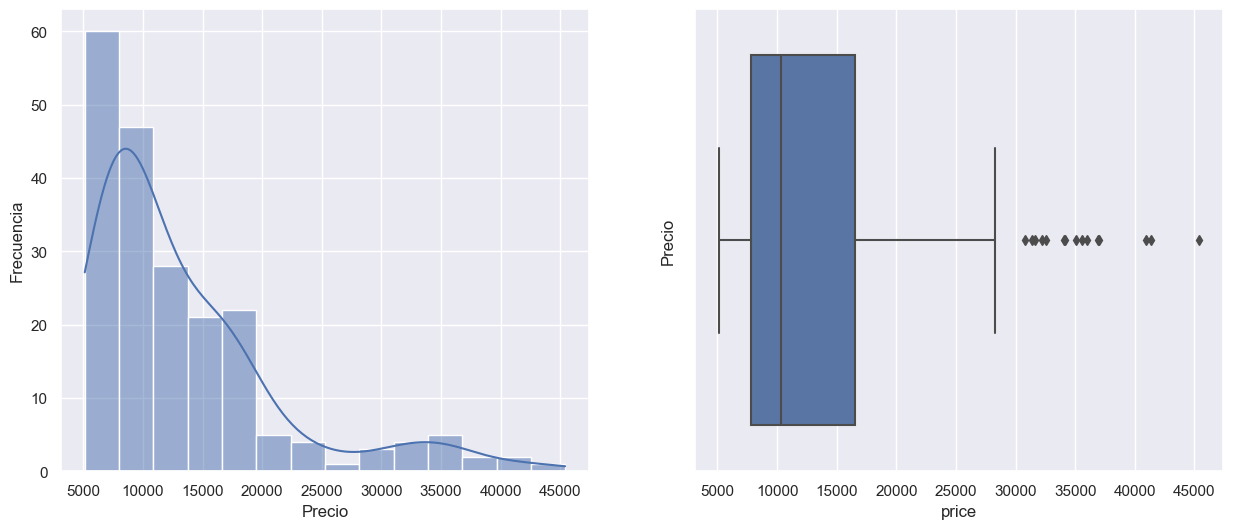

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')
sns.histplot(df['price'], ax=ax[0], kde=True)

ax[1].set_ylabel('Precio')
sns.boxplot(x=df['price'], ax=ax[1])

plt.show()

In [41]:
df.price.describe()


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [51]:
# Asegúrate de que las columnas categóricas estén presentes en el DataFrame
categorical_columns = ['fueltype', 'aspiration', 'carbody', 'drivewheel']

# Aplicar one-hot encoding a las columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Convertir todas las columnas a tipo numérico
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Calcular la correlación
correlation_matrix = df_encoded.corr()

# Mostrar la correlación con la variable 'price'
correlation_series = correlation_matrix['price']

# Imprimir la correlación
print(correlation_series)


enginelocation              NaN
wheelbase              0.577816
carlength              0.682920
carwidth               0.759325
carheight              0.119336
curbweight             0.835305
enginesize             0.874145
boreratio              0.553173
stroke                 0.079443
compressionratio       0.067984
horsepower             0.808139
peakrpm               -0.085267
citympg               -0.685751
highwaympg            -0.697599
price                  1.000000
fueltype_diesel        0.105679
fueltype_gas          -0.105679
aspiration_std        -0.177926
aspiration_turbo       0.177926
carbody_convertible    0.187681
carbody_hardtop        0.225854
carbody_hatchback     -0.262039
carbody_sedan          0.125716
carbody_wagon         -0.042310
drivewheel_4wd        -0.058866
drivewheel_fwd        -0.601950
drivewheel_rwd         0.638957
Name: price, dtype: float64


Variables con una fuerte correlación positiva con el precio:

- enginesize (0.87): Los autos con motores más grandes tienden a tener precios más altos.
- curbweight (0.83): Autos más pesados tienden a tener precios más altos.
- carwidth (0.76): Autos más anchos tienden a tener precios más altos.
- horsepower (0.81): Autos con mayor potencia tienden a tener precios más altos.

Variables con una correlación negativa significativa con el precio:

- highwaympg (-0.70): Autos con mayor eficiencia de combustible (más Km/L en ruta, que en la base de datos figura como millas por galón) tienden a tener precios más bajos.
- citympg (-0.69): Autos con mayor eficiencia de combustible en la ciudad tienden a tener precios más bajos.
- drivewheel_fwd (-0.60): Autos con tracción delantera tienden a tener precios más bajos.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

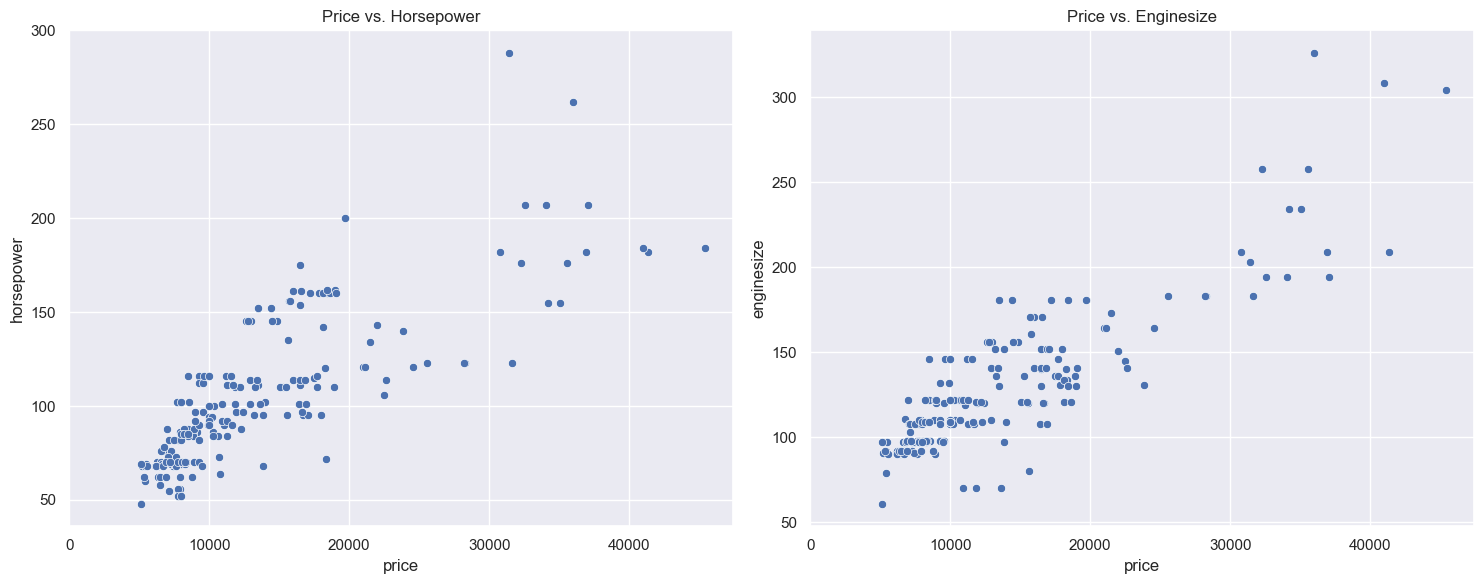

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graficamos correlación positiva: horsepower vs. price
sns.scatterplot(x='price', y='horsepower', data=df, ax=axes[0])
axes[0].set_title('Price vs. Horsepower')
axes[0].set_xlim(left=0)  # Ajuste del eje x para evitar problemas con valores nulos

# Graficamos correlación positiva: enginesize vs. price
sns.scatterplot(x='price', y='enginesize', data=df, ax=axes[1])
axes[1].set_title('Price vs. Enginesize')
axes[1].set_xlim(left=0)  # Ajuste del eje x para evitar problemas con valores nulos

plt.tight_layout()
plt.show()

**Precio vs. Caballos de fuerza:**

- Se puede observar una tendencia positiva, lo que significa que, en general, a medida que aumenta el precio, también tiende a aumentar la potencia del motor (caballos de fuerza).
 Esto sugiere que los autos con motores más potentes tienden a tener precios más altos.

**Precio vs. Tamaño del motor:**

- También se observa una tendencia positiva, indicando que los autos con motores más grandes tienden a tener precios más altos.
 En este caso, la relación entre el tamaño del motor y el precio parece ser bastante fuerte, ya que los puntos tienden a agruparse en una línea creciente.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

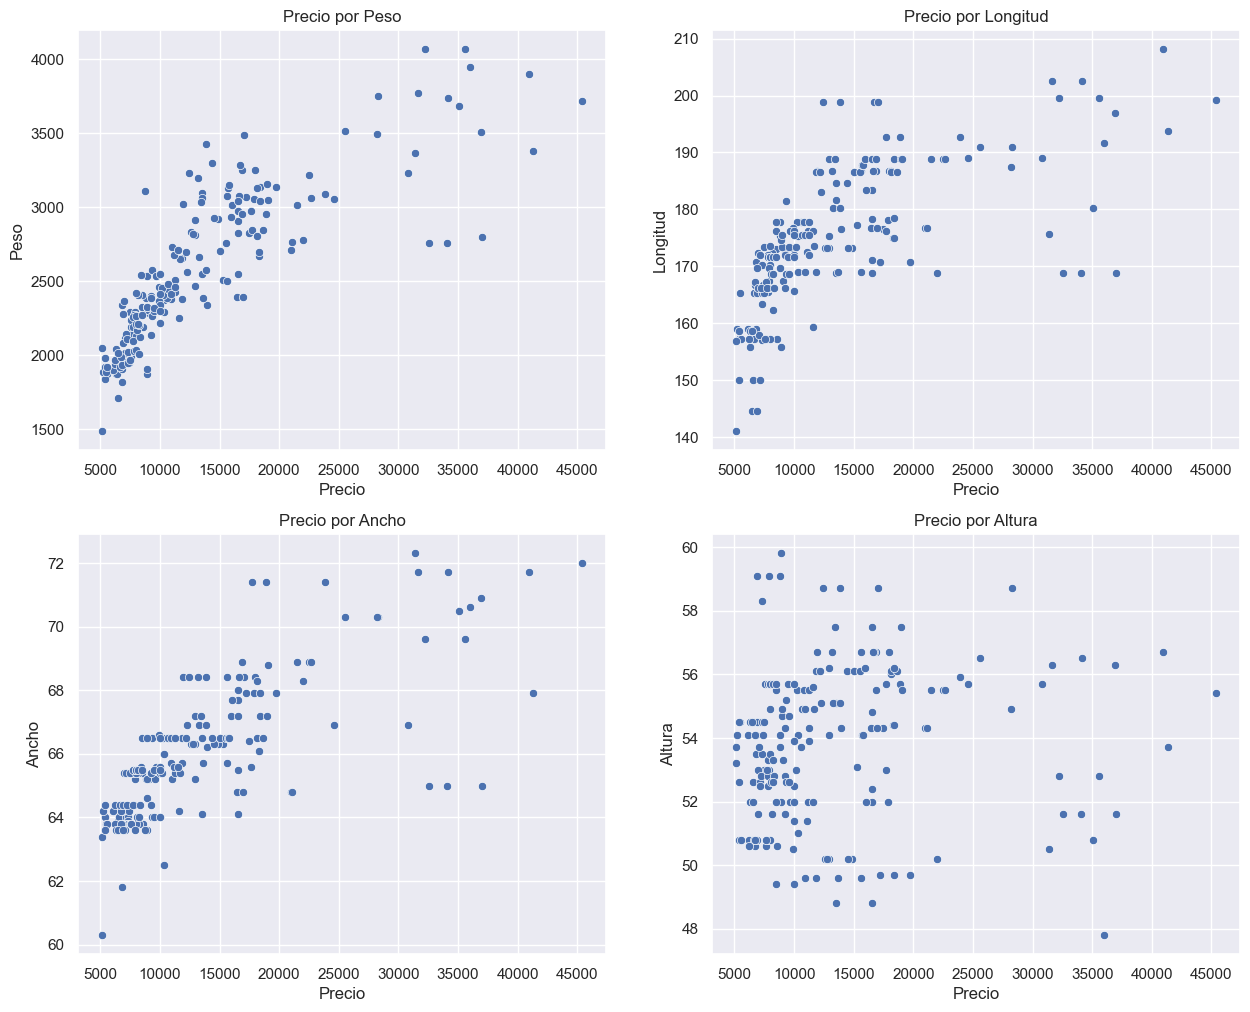

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

variables = ['curbweight', 'carlength', 'carwidth', 'carheight']
labels = ['Peso', 'Longitud', 'Ancho', 'Altura']

# Bucle para crear subgráficos
for i in range(2):
    for j in range(2):
        # Configuración del título y etiquetas de los ejes
        ax[i, j].set_title(f'Precio por {labels[i * 2 + j]}')
        ax[i, j].set_xlabel('Precio')
        ax[i, j].set_ylabel(labels[i * 2 + j])
        
        # Graficar el scatterplot
        sns.scatterplot(data=df, y=variables[i * 2 + j], x='price', ax=ax[i, j])

plt.show()

Precio vs. Peso:

- Existe una tendencia positiva: a medida que el peso del automóvil aumenta, el precio también tiende a aumentar.
Se observan algunos puntos dispersos, pero en general, la relación sugiere que los autos más pesados tienden a ser más caros.

Precio vs. Longitud del Automóvil:

- La relación entre el precio y la longitud del automóvil parece ser variada y no tan clara.
Algunos autos más largos pueden tener precios más altos, pero la relación no es tan fuerte como en el caso del peso.

Precio vs. Ancho del Automóvil:

- Existe una tendencia positiva: los autos más anchos tienden a tener precios más altos.
Similar a la relación con el peso, la tendencia sugiere que los autos más grandes en términos de ancho pueden tener precios más altos.

Precio vs. Altura del Automóvil:

- La relación entre el precio y la altura del automóvil no es muy clara.
Puede haber una ligera tendencia a que los autos más altos tengan precios más bajos, pero hay bastante dispersión.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

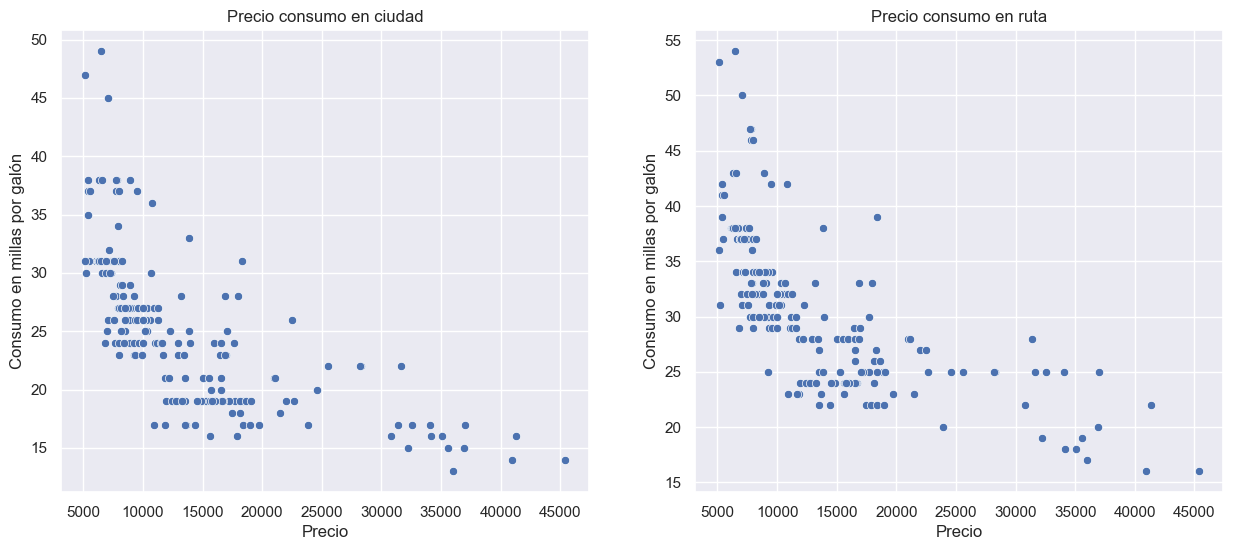

In [62]:
fix , ax = plt.subplots(1 , 2 ,figsize=(15,6))

ax[0].set_title('Precio consumo en ciudad')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Consumo en millas por galón')
sns.scatterplot(data =df ,y = 'citympg' , x = 'price',ax=ax[0])
              
ax[1].set_title('Precio consumo en ruta')
ax[1].set_xlabel('Precio')
ax[1].set_ylabel('Consumo en millas por galón')
sns.scatterplot(data =df ,y = 'highwaympg' , x = 'price',ax=ax[1])
                
plt.show()

Observamos que hay una correlacion negativa entre las variables, esto nos dice que en cuanto mas eficiente el vehículo es, mas aumenta su precio.

Se van a proceder a eliminar las variables numéricas con poca o nula correlación.

In [64]:
df.drop(['carheight','boreratio','stroke','compressionratio','peakrpm'] , axis = 1 , inplace = True)

KeyError: "['carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm'] not found in axis"

In [74]:
minimo = 0
mediana = df['price'].median()
maximo = df['price'].max()
print(mediana)

10295.0


In [75]:
bins = (minimo, mediana, maximo)
labels = [0,1]
gama = pd.cut(df.price, bins , labels = labels)

In [76]:
df['Gama'] = gama
df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price,Gama
0,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,130,111,21,27,13495.0,1
1,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,130,111,21,27,16500.0,1
2,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,152,154,19,26,16500.0,1
3,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,109,102,24,30,13950.0,1
4,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,136,115,18,22,17450.0,1


In [77]:
scaler = StandardScaler()
le= preprocessing.LabelEncoder()
numericas = ['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','price']
categoricas = ['fueltype','aspiration','carbody','drivewheel','enginelocation']

In [78]:
df_cl[numericas] = scaler.fit_transform(df_cl[numericas])

for n in categoricas:
    df_cl[n] = le.fit_transform(df_cl[n])

df_cl.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price,Gama
0,1,0,0,2,0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.027391,1
1,1,0,0,2,0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.404461,1
2,1,0,2,2,0,-0.708596,-0.231513,-0.190566,0.514882,0.604046,1.264536,-0.953012,-0.691627,0.404461,1
3,1,0,3,1,0,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.053668,-0.186865,-0.109354,0.084485,1
4,1,0,3,0,0,0.107110,0.207256,0.230001,0.516807,0.218885,0.275883,-1.106241,-1.273900,0.523668,1


In [87]:
# Asignamos la columna 'Gama' como variable objetivo (y)
# Creamos un DataFrame con las variables predictoras (x), excluyendo 'Gama' y 'price'
y = df_cl['Gama']
X = df_cl.drop(['Gama', 'price'], axis=1)

In [88]:
# Creamos un clasificador de árbol de decisión con una profundidad máxima de 4 niveles
tree = DecisionTreeClassifier(max_depth=4)

In [89]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
#Procedemos a entrenar el árbol.
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [92]:
# Realizamos predicciones en el conjunto de entrenamiento
predictions_train = tree.predict(X_train)

# Realizamos predicciones en el conjunto de prueba
predictions_test = tree.predict(X_test)

# Calculamos la precisión en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Precisión en el conjunto de entrenamiento: {accuracy_train:.2f}")

# Calculamos la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Precisión en el conjunto de prueba: {accuracy_test:.2f}")


Precisión en el conjunto de entrenamiento: 0.98
Precisión en el conjunto de prueba: 0.87


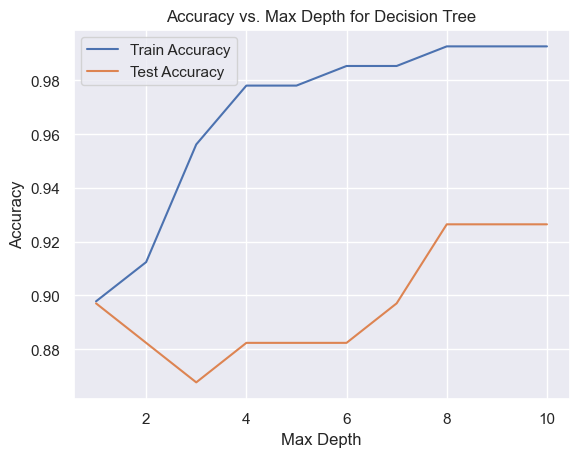

In [95]:
# Listas vacías para almacenar los valores de precisión
accuracy_train_values = []
accuracy_test_values = []

# Valores para explorar
deep_values = list(range(1, 11))

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for depth in deep_values:
    # Creamos y entrenamos el modelo con el valor actual de profundidad
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    # Predecimos sobre el conjunto de entrenamiento y prueba
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    # Almacenamos las precisiones en las listas
    accuracy_train_values.append(accuracy_score(y_train, y_train_pred))
    accuracy_test_values.append(accuracy_score(y_test, y_test_pred))

# Gráfico para visualizar las precisiones en función de la profundidad
plt.plot(deep_values, accuracy_train_values, label='Train Accuracy')
plt.plot(deep_values, accuracy_test_values, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth for Decision Tree')
plt.legend()
plt.show()

In [96]:
y = df_cl['Gama']
x = df_cl[['enginesize', 'curbweight', 'enginelocation']]

In [98]:
# Lista de valores de correlación absolutos
lista = [0.10569, 0.177926, 0.083976, 0.57792, 0.324973, 0.577816, 0.682920, 0.759325, 0.835305, 0.874145, 0.808139, 0.685751, 0.697599]

# Ordenar la lista de mayor a menor
sorted_list = sorted(lista, reverse=True)

print(sorted_list)
print(df_cl.corr()['price'])

[0.874145, 0.835305, 0.808139, 0.759325, 0.697599, 0.685751, 0.68292, 0.57792, 0.577816, 0.324973, 0.177926, 0.10569, 0.083976]
fueltype         -0.105679
aspiration        0.177926
carbody          -0.083976
drivewheel        0.577992
enginelocation    0.324973
wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
curbweight        0.835305
enginesize        0.874145
horsepower        0.808139
citympg          -0.685751
highwaympg       -0.697599
price             1.000000
Gama              0.691013
Name: price, dtype: float64


In [102]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [105]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9781021897810219
Accuracy sobre conjunto de Test: 0.8823529411764706


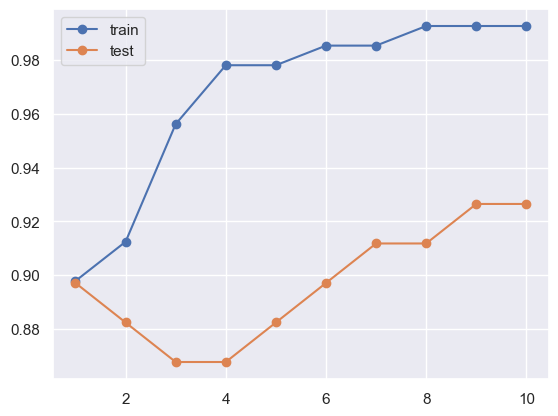

In [113]:
lista_accuracy_train = []
lista_accuracy_test = []
deep = list(range(1, 11))

for d in deep:

    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = tree.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

plt.plot(deep, lista_accuracy_train, 'o-', label='train')
plt.plot(deep, lista_accuracy_test, 'o-', label='test')
plt.legend()
plt.show()

In [114]:
# Matriz de confusión

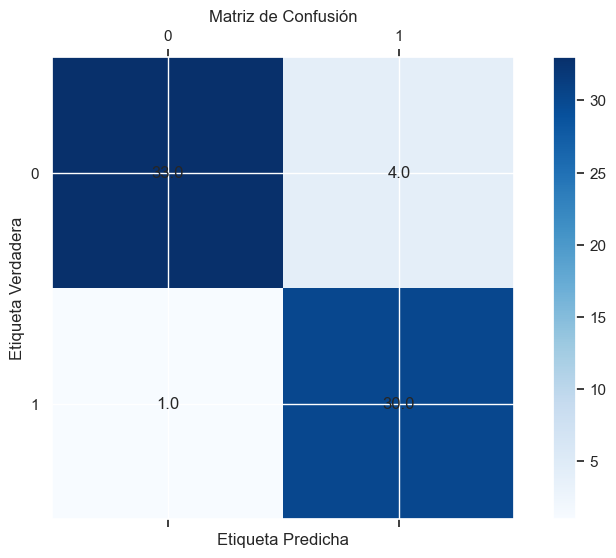

[[33  4]
 [ 1 30]]


In [117]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Creamos la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Mostramos la matriz de confusión como una imagen
cax = ax.matshow(cm, cmap=plt.cm.Blues)

# Configuramos etiquetas y título
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')

# Agregamos los valores en cada celda
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

# Mostramos la barra de color
plt.colorbar(cax)

plt.show()
print(cm)

In [118]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree, X, y, cv=5)

# Calculamos la precisión media y la desviación estándar de la precisión
accuracy_mean = tree_scores.mean()
accuracy_std = tree_scores.std() * 2

# Imprimimos la precisión media y la desviación estándar
print(f"Accuracy para Tree: {accuracy_mean:.2f} (+/- {accuracy_std:.2f})")


Accuracy para Tree: 0.85 (+/- 0.15)


In [119]:
df_lr = df.copy()

df_lr[numericas] = scaler.fit_transform(df_lr[numericas])

for n in categoricas:
    df_lr[n] = le.fit_transform(df_lr[n])

df_lr.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price,Gama
0,1,0,0,2,0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.027391,1
1,1,0,0,2,0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,-0.646553,-0.546059,0.404461,1
2,1,0,2,2,0,-0.708596,-0.231513,-0.190566,0.514882,0.604046,1.264536,-0.953012,-0.691627,0.404461,1
3,1,0,3,1,0,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.053668,-0.186865,-0.109354,0.084485,1
4,1,0,3,0,0,0.107110,0.207256,0.230001,0.516807,0.218885,0.275883,-1.106241,-1.273900,0.523668,1


In [121]:
correlation_series = df_lr.corr()['price']
print(correlation_series)

fueltype         -0.105679
aspiration        0.177926
carbody          -0.083976
drivewheel        0.577992
enginelocation    0.324973
wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
curbweight        0.835305
enginesize        0.874145
horsepower        0.808139
citympg          -0.685751
highwaympg       -0.697599
price             1.000000
Gama              0.691013
Name: price, dtype: float64


In [122]:
y = df_lr['price']
x = df_lr.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.11470413630406359
Error en datos de test: 0.2105906113756509


In [138]:
reescalado = mean_squared_error(y_test, y_test_pred)

In [139]:
# Desescalamos el error cuadrático medio
final = reescalado * 4968.444389 + 11509.400879

print('Error en datos de test reescalado:', final)

Error en datos de test reescalado: 12555.708620465433


In [140]:
r2 = r2_score(y_test, y_test_pred)
print("Coeficiente de determinación (R2):", r2)

Coeficiente de determinación (R2): 0.7956039446262848
